In [58]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageEnhance

%matplotlib inline

In [2]:
path = 'test_image.png'

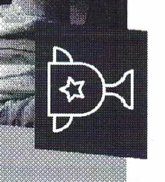

In [16]:
image = Image.open(path).convert('RGB')
image

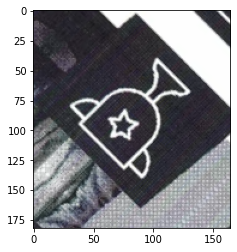

In [38]:
def load_image(path):
    image = tf.io.read_file(path)
    image = tf.io.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32, saturate=True)
    return image

tf_image = load_image(path)
tf_image = tf.reshape(tf_image, (1, *tf_image.shape))
rotated_image = tf.keras.layers.experimental.preprocessing.RandomRotation((0.125, 0.125))(tf_image)
plt.imshow(rotated_image[0])
plt.show()

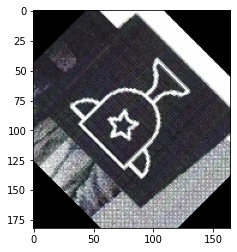

In [40]:
plt.imshow(image.rotate(45))
plt.show()

In [47]:
tf.constant(image.getdata(), shape=(*image.size, 3))

<tf.Tensor: shape=(165, 182, 3), dtype=int32, numpy=
array([[[ 36,  35,  41],
        [ 28,  24,  32],
        [ 33,  30,  37],
        ...,
        [189, 191, 197],
        [192, 193, 201],
        [173, 175, 183]],

       [[166, 167, 175],
        [148, 149, 157],
        [179, 180, 189],
        ...,
        [124, 122, 120],
        [150, 147, 146],
        [ 98,  96,  94]],

       [[137, 135, 133],
        [ 91,  89,  88],
        [ 72,  70,  69],
        ...,
        [ 63,  59,  65],
        [ 37,  33,  39],
        [ 42,  38,  45]],

       ...,

       [[178, 184, 185],
        [119, 127, 130],
        [203, 211, 214],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 25

In [147]:
def random_augment_image(path, rfactor=0.17):

    def _adjust_random_sharpness(image, low=-3.0, high=4.0):
        factor = np.random.uniform(low, high)
        sharpness = ImageEnhance.Sharpness(image)
        result_image = sharpness.enhance(factor)
        return result_image


    def _adjust_random_brightness(image, low=0.2, high=3.8):
        factor = np.random.uniform(low, high)
        sharpness = ImageEnhance.Brightness(image)
        result_image = sharpness.enhance(factor)
        return result_image


    def _adjust_random_contrast(image, low=0.3, high=2.0):
        factor = np.random.uniform(low, high)
        sharpness = ImageEnhance.Contrast(image)
        result_image = sharpness.enhance(factor)
        return result_image


    def _adjust_random_color(image, low=-3.0, high=4.0):
        factor = np.random.uniform(low, high)
        sharpness = ImageEnhance.Color(image)
        result_image = sharpness.enhance(factor)
        return result_image

    def _adjust_random_rotation(image, max_angle=360):
        angle = np.random.randint(low=0, high=max_angle)
        return image.rotate(angle)

    image = Image.open(path).convert('RGB')
    if np.random.rand() > rfactor:
        image = _adjust_random_brightness(image, low=0.7, high=2.0)
    if np.random.rand() > rfactor:
        image = _adjust_random_color(image, low=0.7, high=2.)
    if np.random.rand() > rfactor:
        image = _adjust_random_contrast(image)
    if np.random.rand() > rfactor:
        image = _adjust_random_sharpness(image)
    if np.random.rand() > rfactor:
        image = _adjust_random_rotation(image)
    return image


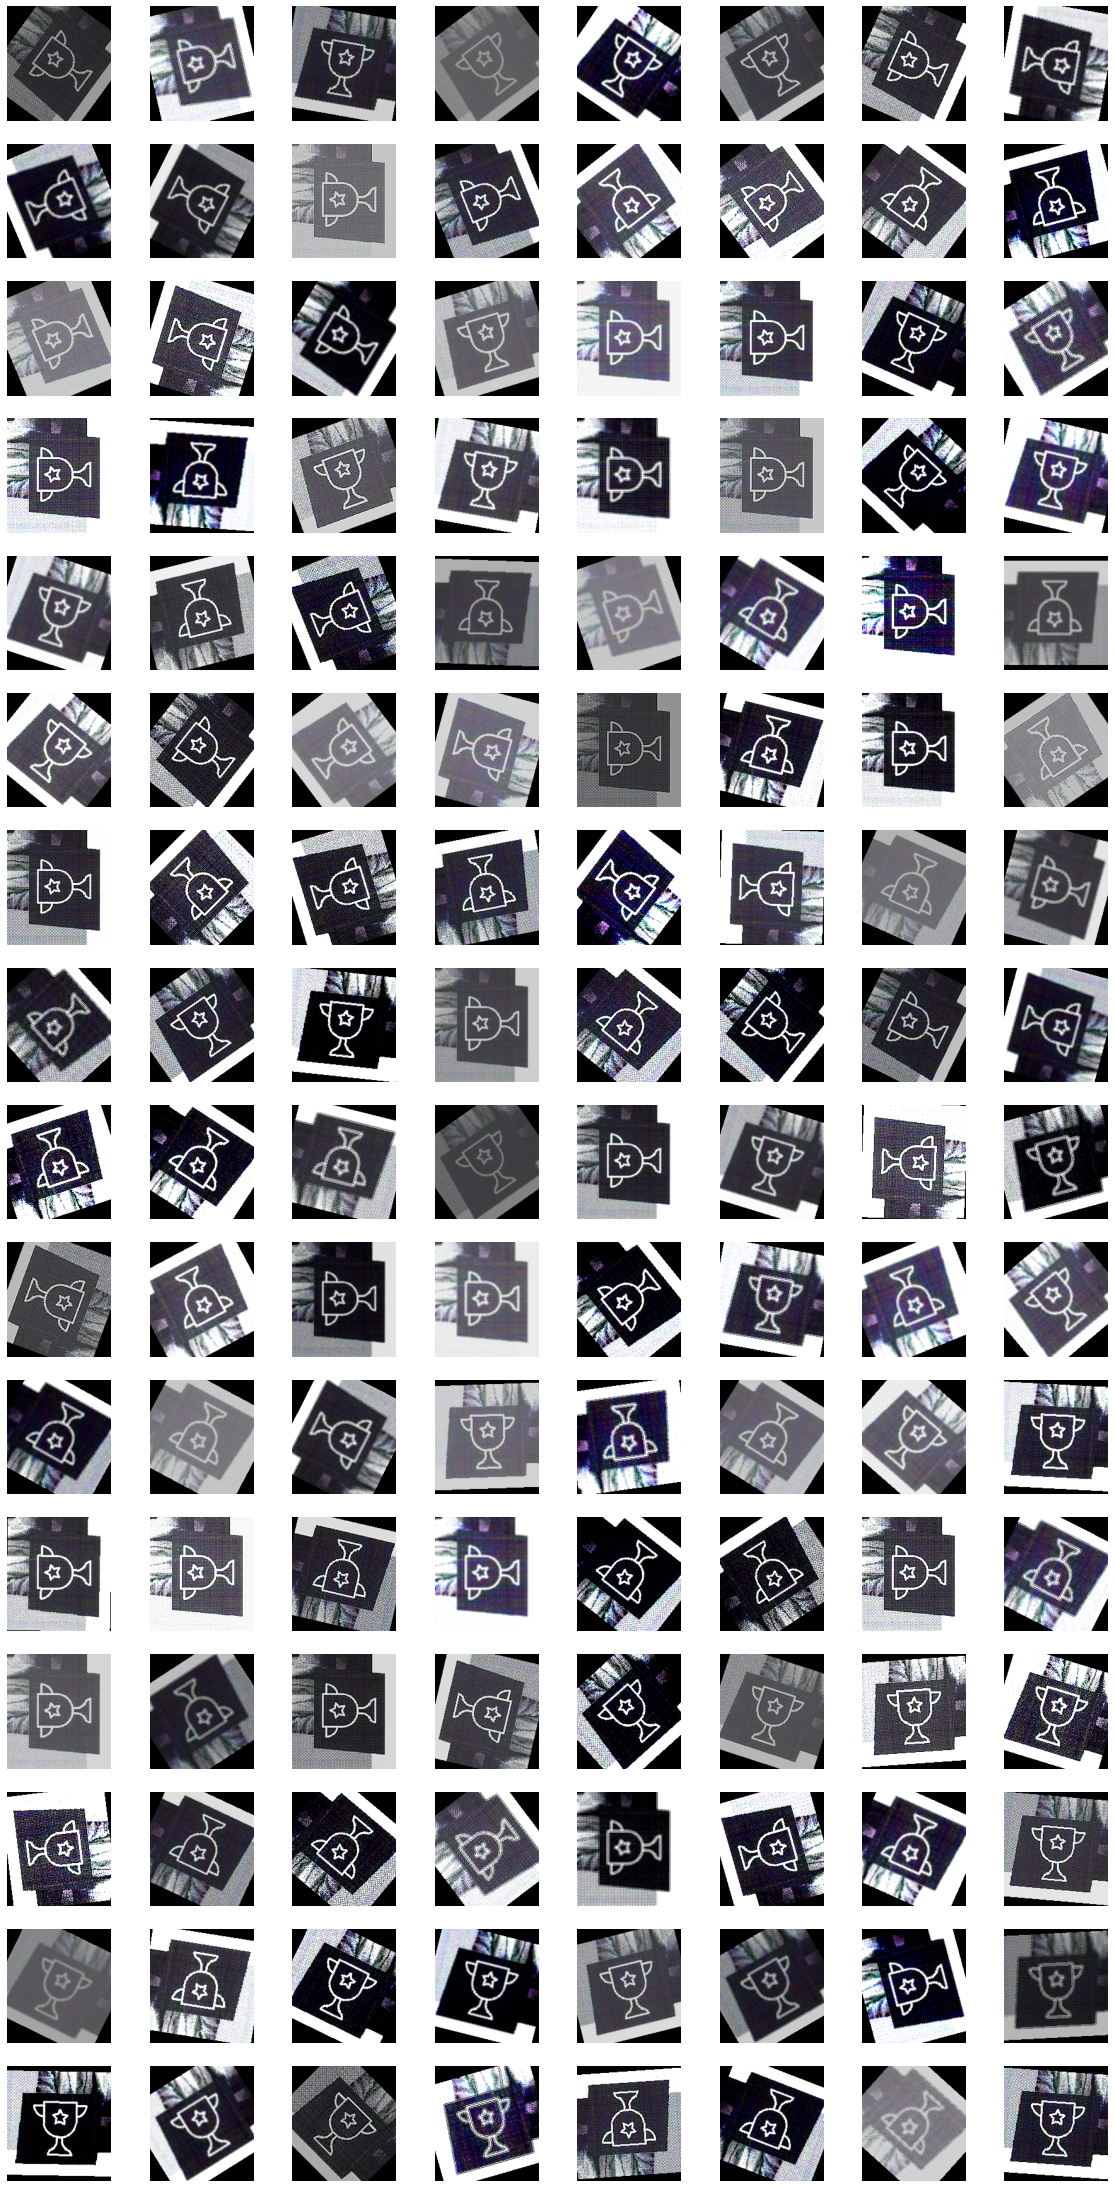

In [148]:
plt.figure(figsize=(20, 40))
for i in range(128):
    img = random_augment_image(path)
    plt.subplot(16, 8, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

0.5533525344155671